In [133]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from langdetect import detect
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score

## Data Processing
**Importing Datasets**

In [134]:
#importing the datasets
data1_fake = pd.read_csv('./Data_RealFake/Dataset1/Fake1.csv')
data1_true = pd.read_csv('./Data_RealFake/Dataset1/True1.csv')

dtset1_fake = pd.DataFrame(data1_fake)
dtset1_true = pd.DataFrame(data1_true)

Changing the labels: fake = 0 and real = 1

In [135]:
dtset1_fake['label']=0
dtset1_true['label']=1

pd.DataFrame.head(dtset1_fake)
pd.DataFrame.head(dtset1_true)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [136]:
print(dtset1_fake.shape)
print(dtset1_true.shape)

(23481, 5)
(21417, 5)


Concatinating Datasets

In [137]:
dataset1 = pd.concat([dtset1_fake, dtset1_true])
pd.DataFrame.head(dataset1)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [138]:
dataset1.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

Combining Title and Text

In [139]:
dataset1['content'] = dataset1['title']+" "+dataset1['text']

In [140]:
pd.DataFrame.head(dataset1)

,title,text,subject,date,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...


Dataset content

In [141]:
dataset1.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

## Dataset Feature Extraction and Selection

In [142]:
content = dataset1.content
print(content)

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
21412    'Fully committed' NATO backs new U.S. approach...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorit...
21415    Vatican upbeat on possibility of Pope Francis ...
21416    Indonesia to buy $1.14 billion worth of Russia...
Name: content, Length: 44898, dtype: object


**Porter Stemmer**

In [143]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed = re.sub('[^a-zA-Z]',' ', content)
    stemmed = stemmed.lower()
    stemmed = stemmed.split()
    stemmed = [port_stem.stem(word) for word in stemmed if not word in stopwords.words('english')]
    stemmed = ' '.join(stemmed)
    return stemmed

In [ ]:
dataset1['content'] = dataset1['content'].apply(stemming)
pd.DataFrame.head(dataset1)

In [145]:
X = dataset1['content'].values

**Tf-Idf Vectorizer**

In [146]:
#TfIdf Vectorizer
#vectorizer = TfidfVectorizer()
#vectorizer.fit(X)
#X = vectorizer.transform(X)

#print(X)

**CountVectorizer**

In [147]:
#CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

print(X)

  (0, 720)	1
  (0, 2032)	1
  (0, 2765)	1
  (0, 3195)	1
  (0, 3363)	2
  (0, 3369)	1
  (0, 3641)	1
  (0, 3897)	1
  (0, 4021)	2
  (0, 4119)	2
  (0, 4154)	1
  (0, 4156)	1
  (0, 4162)	3
  (0, 5286)	13
  (0, 5977)	1
  (0, 6904)	1
  (0, 8736)	1
  (0, 8741)	1
  (0, 8943)	1
  (0, 10639)	1
  (0, 10649)	1
  (0, 11039)	6
  (0, 11164)	1
  (0, 11326)	1
  (0, 11464)	1
  :	:
  (44897, 105217)	1
  (44897, 105678)	1
  (44897, 107389)	1
  (44897, 107508)	1
  (44897, 108220)	1
  (44897, 108256)	5
  (44897, 108863)	1
  (44897, 109626)	10
  (44897, 110204)	1
  (44897, 110370)	3
  (44897, 110388)	1
  (44897, 111556)	2
  (44897, 111714)	1
  (44897, 112290)	2
  (44897, 112369)	1
  (44897, 113657)	1
  (44897, 114291)	1
  (44897, 116465)	1
  (44897, 117159)	1
  (44897, 118026)	1
  (44897, 118321)	2
  (44897, 118719)	1
  (44897, 119114)	2
  (44897, 119619)	3
  (44897, 120806)	1


**Train Test Split**

In [148]:
y = dataset1['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=80)

print(X_train.shape)
print(X_test.shape)


(35918, 122513)
(8980, 122513)


In [149]:
print(X_train)

  (0, 1380)	1
  (0, 3936)	1
  (0, 6223)	1
  (0, 8652)	1
  (0, 8736)	2
  (0, 8950)	1
  (0, 9192)	1
  (0, 9954)	1
  (0, 10118)	1
  (0, 11664)	1
  (0, 12038)	5
  (0, 12459)	1
  (0, 13037)	1
  (0, 17043)	1
  (0, 17855)	1
  (0, 18196)	3
  (0, 19458)	1
  (0, 19961)	1
  (0, 20418)	1
  (0, 20492)	1
  (0, 21824)	1
  (0, 21876)	1
  (0, 22008)	1
  (0, 22023)	1
  (0, 22668)	1
  :	:
  (35917, 106676)	1
  (35917, 106765)	1
  (35917, 107673)	1
  (35917, 108220)	3
  (35917, 108256)	12
  (35917, 108444)	3
  (35917, 108678)	1
  (35917, 108730)	4
  (35917, 109225)	2
  (35917, 109626)	5
  (35917, 109668)	1
  (35917, 109887)	1
  (35917, 110971)	1
  (35917, 114291)	1
  (35917, 115338)	2
  (35917, 115840)	1
  (35917, 116384)	1
  (35917, 117154)	1
  (35917, 117325)	1
  (35917, 118026)	2
  (35917, 118321)	1
  (35917, 119114)	2
  (35917, 120998)	1
  (35917, 121196)	8
  (35917, 121236)	1


In [150]:
X_test

<8980x122513 sparse matrix of type '<class 'numpy.int64'>'
	with 1911449 stored elements in Compressed Sparse Row format>

In [151]:
y_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [152]:
y_test

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

## Model Training

**Logistic Regression**

In [153]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LRpred = LR.predict(X_test)

c:\Users\jimue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
print(LRpred)
print(y_test)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


In [155]:
LRscore = LR.score(X_test, y_test)
print(LRscore)

0.9975501113585746


[[4690   13]
 [   9 4268]]


c:\Users\jimue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


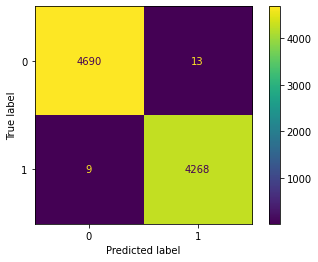

In [156]:
from sklearn import metrics
LR_r_score = metrics.confusion_matrix(y_test, LRpred)
print(LR_r_score)
plot_confusion_matrix(LR, X_test, y_test)

In [157]:
LR_r_score = np.flip(LR_r_score)

#accuracy
LR_acc = (LR_r_score[0][0] + LR_r_score[-1][-1]) / np.sum(LR_r_score)
print('accuracy: '+ str(float(LR_acc)))

#precission
LR_precision = sklearn.metrics.precision_score(y_test, LRpred)
print('precision: '+ str(float(LR_precision)))

#recall
LR_recall = sklearn.metrics.recall_score(y_test, LRpred)
print('recall: '+ str(float(LR_recall)))

accuracy: 0.9975501113585746
precision: 0.9969633263256249
recall: 0.9978957212999766


**AdaBoost Classifier**

In [158]:
Ada = AdaBoostClassifier()
Ada.fit(X_train, y_train)
Adapred = Ada.predict(X_test)

In [159]:
print(Adapred)
print(y_test)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


In [160]:
Adascore = Ada.score(X_test, y_test)
print(Adascore)

0.9962138084632517


[[4685   18]
 [  16 4261]]


c:\Users\jimue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


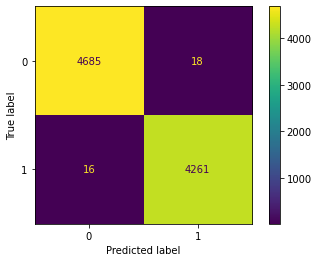

In [161]:
Ada_r_score = metrics.confusion_matrix(y_test, Adapred)
print(Ada_r_score)
plot_confusion_matrix(Ada, X_test, y_test)

In [162]:
Ada_r_score = np.flip(Ada_r_score)

#accuracy
Ada_acc = (Ada_r_score[0][0] + Ada_r_score[-1][-1]) / np.sum(Ada_r_score)
print('accuracy: '+ str(float(Ada_acc)))

#precission
Ada_precision = sklearn.metrics.precision_score(y_test, Adapred)
print('precision: '+ str(float(Ada_precision)))

#recall
Ada_recall = sklearn.metrics.recall_score(y_test, Adapred)
print('recall: '+ str(float(Ada_recall)))

accuracy: 0.9962138084632517
precision: 0.9957934096751577
recall: 0.9962590600888473


*Random Forest*

In [163]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RFpred = RF.predict(X_test)

In [164]:
print(RFpred)
print(y_test)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


In [165]:
RFscore = RF.score(X_test, y_test)
print(RFscore)

0.9915367483296214


[[4674   29]
 [  47 4230]]


c:\Users\jimue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


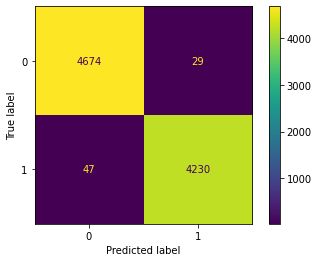

In [166]:
RF_r_score = metrics.confusion_matrix(y_test, RFpred)
print(RF_r_score)
plot_confusion_matrix(RF, X_test, y_test)

In [167]:
RF_r_score = np.flip(RF_r_score)

#accuracy
RF_acc = (RF_r_score[0][0] + RF_r_score[-1][-1]) / np.sum(RF_r_score)
print('accuracy: '+ str(float(RF_acc)))

#precission
RF_precision = sklearn.metrics.precision_score(y_test, RFpred)
print('precision: '+ str(float(RF_precision)))

#recall
RF_recall = sklearn.metrics.recall_score(y_test, RFpred)
print('recall: '+ str(float(RF_recall)))

accuracy: 0.9915367483296214
precision: 0.9931908898802536
recall: 0.989010989010989


**Input Function for manual testing**

In [168]:
def wordopt(text):
    text = re.sub('[^a-zA-Z]',' ', text)
    text = text.lower()
    return text

def output_lable(n):
    if n == 0:
        return "This news is unreliable."
    elif n == 1:
        return "This news is reliable."
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(stemming) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    
    return print((output_lable(pred_LR[0])))


In [169]:
news = str(input())
manual_testing(news)

This news is unreliable.


In [170]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'émigré', 'état', 'žižek'], dtype=object)